# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df["title"].astype(str).str.len()
data = df['title_length']
df.head()

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [3]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df["title_length"].mean() # Longitud promedio del título
mediana = df["title_length"].median() # Tamaño medio del título
moda = df['title_length'].mode()[0] # Longitud que más se repite

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)

Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [4]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["title_length"].max() - df["title_length"].min() # Diferencia caracteres entre el título más largo y el más corto
varianza = df["title_length"].var() # Varianza, medimos cuanto se alejan los datos
desv_std = df["title_length"].std() # Desviación Estándar, R² de Varianza

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desv_std)

Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = df["title_length"].skew() # Si Asimetía es > 0 = cola hacia la derecha (títulos muy largos)
curtosis = df["title_length"].kurt() # Hay más títulos inusualmente largos

print("Asimetría:", asimetria)
print("Curtosis:", curtosis)

Asimetría: 1.5252523464631278
Curtosis: 3.8122887061291544


In [6]:
# Imprime el título más corto y el título más largo según su longitud
titulo_corto = df.loc[df["title_length"].idxmin(), "title"]
titulo_largo = df.loc[df["title_length"].idxmax(), "title"]

print("Título más corto:", titulo_corto)
print("Título más largo:", titulo_largo)


Título más corto: M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


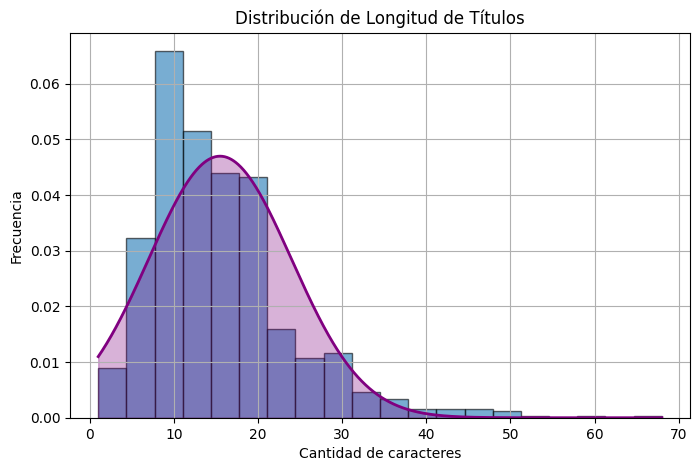

In [13]:
# grafica tus resultados

# Histograma
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(
    df["title_length"],
    bins=20,
    density=True,
    edgecolor="black",
    alpha=0.6
)

# Curva normal
# Valores para curva
x = np.linspace(data.min(), data.max(), 1000)
normal_curve = (1 / (desv_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media)/desv_std)**2)
ax.plot(x, normal_curve, color="purple", linewidth=2)
# Relleno
ax.fill_between(
    x,
    normal_curve,
    color="purple",
    alpha=0.3
)

ax.set_title("Distribución de Longitud de Títulos")
ax.set_xlabel("Cantidad de caracteres")
ax.set_ylabel("Frecuencia")
ax.grid(True)

plt.show()


Se observa que hay una tendencia en la longitud de títulos en los 10 caracteres.

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [16]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
valores = df["title_length"].iloc[:5].tolist()
print(valores)

[24, 13, 22, 15, 12]


In [18]:
# Calcula la media de los 5 valores
media = np.mean(valores)
print("Media:", media)

Media: 17.2


In [ ]:
# Calcula las diferencias al cuadrado con respecto a la media
# Diferencias al cuadrado
diferencias = [(x - media)**2 for x in valores]
suma_diferencias = sum(diferencias)

print(f"Suma de diferencias al cuadrado: {suma_diferencias}")


Suma de diferencias al cuadrado: 118.80000000000001


In [48]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza = suma_diferencias / (len(valores) - 1)
desviacion = varianza**0.5

print("Varianza:", varianza)
print("Desviación estándar:", desviacion)


Varianza: 29.700000000000003
Desviación estándar: 5.449770637375485
